# Imports

In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import pandas as pd
import numpy as np
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict, init_model_linear, compile_model_linear
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate

# Data

In [95]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [5]:
df = preprocess(PA75016_df)
df

You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.2% of NA
['PM25', 'PM10', 'NO2', 3]
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,Pollution_peak,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,-0.781831,0.623490,0
2018-01-02,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.000000,1.000000,0
2018-01-03,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.781831,0.623490,0
2018-01-04,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.974928,-0.222521,0
2018-01-05,-0.025605,-0.131895,-0.840686,0.0,0,0.000000,1.0,0.433884,-0.900969,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0.0,0,-0.866025,0.5,0.781831,0.623490,0
2022-11-10,0.012802,-0.389522,-0.465686,0.0,0,-0.866025,0.5,0.974928,-0.222521,0
2022-11-11,-0.315789,-0.951002,-1.296569,0.0,0,-0.866025,0.5,0.433884,-0.900969,0


In [6]:
df[df["confinement"]==1]['ATMO'].value_counts()

1    48
0    46
2    35
Name: ATMO, dtype: int64

In [7]:
df.describe()

,PM25,PM10,NO2,Pollution_peak,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1.775000e+03,1.775000e+03,1775.000000,1775.000000,1775.000000
mean,0.287425,0.161112,0.093362,0.003944,1.100282,1.422463e-02,-2.556229e-02,0.000353,0.000282,0.072676
std,1.009216,0.818783,0.780630,0.062692,0.781029,7.085565e-01,7.054467e-01,0.707206,0.707406,0.259677
min,-1.421053,-1.356549,-2.125000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,0.000000
25%,-0.368421,-0.424037,-0.470588,0.000000,0.000000,-5.000000e-01,-8.660254e-01,-0.781831,-0.900969,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.224647e-16,-1.836970e-16,0.000000,-0.222521,0.000000
75%,0.631579,0.575963,0.529412,0.000000,2.000000,8.660254e-01,5.000000e-01,0.781831,0.623490,0.000000
max,6.728307,4.478274,4.426471,1.000000,2.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000


# Cross-validate

In [ ]:
cross_validate(df)

# Model training

In [8]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON

In [9]:
(df_train, df_test) = train_test_split(fold = df,
                                        train_test_ratio = TRAIN_TEST_RATIO,
                                        input_length = INPUT_LENGTH,
                                        horizon = HORIZON)

In [10]:
df_train.shape, df_test.shape

((1242, 10), (540, 10))

In [11]:
X_train, y_train = get_X_y(fold = df_train,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

X_test, y_test = get_X_y(fold = df_test,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

Split-set shape:
X: (1229, 7, 10), y: (1229, 7)
Split-set shape:
X: (527, 7, 10), y: (527, 7)


In [131]:
model = init_model_linear(X_train, y_train)
compile_model_linear(model)
model, history = fit_model(model, X_train, y_train, epochs=200, patience = 20)

Epoch 1/200
27/27 [==============================] - 19s 138ms/step - loss: 1.9441 - mae: 1.1804 - val_loss: 1.7304 - val_mae: 1.1209
Epoch 2/200
27/27 [==============================] - 0s 14ms/step - loss: 1.3069 - mae: 0.9656 - val_loss: 0.8577 - val_mae: 0.7730
Epoch 3/200
27/27 [==============================] - 0s 14ms/step - loss: 0.7290 - mae: 0.7199 - val_loss: 0.6418 - val_mae: 0.6868
Epoch 4/200
27/27 [==============================] - 0s 15ms/step - loss: 0.6127 - mae: 0.6681 - val_loss: 0.5769 - val_mae: 0.6471
Epoch 5/200
27/27 [==============================] - 0s 15ms/step - loss: 0.5654 - mae: 0.6386 - val_loss: 0.5434 - val_mae: 0.6290
Epoch 6/200
27/27 [==============================] - 0s 16ms/step - loss: 0.5362 - mae: 0.6238 - val_loss: 0.5243 - val_mae: 0.6194
Epoch 7/200
27/27 [==============================] - 0s 14ms/step - loss: 0.5205 - mae: 0.6151 - val_loss: 0.5150 - val_mae: 0.6156
Epoch 8/200
27/27 [==============================] - 0s 16ms/step - loss: 

27/27 [==============================] - 0s 14ms/step - loss: 0.3853 - mae: 0.5217 - val_loss: 0.4650 - val_mae: 0.5732
Epoch 63/200
27/27 [==============================] - 0s 12ms/step - loss: 0.3836 - mae: 0.5219 - val_loss: 0.4645 - val_mae: 0.5723
Epoch 64/200
27/27 [==============================] - 0s 13ms/step - loss: 0.3812 - mae: 0.5183 - val_loss: 0.4655 - val_mae: 0.5730
Epoch 65/200
27/27 [==============================] - 0s 15ms/step - loss: 0.3785 - mae: 0.5163 - val_loss: 0.4674 - val_mae: 0.5734
Epoch 66/200
27/27 [==============================] - 1s 21ms/step - loss: 0.3778 - mae: 0.5150 - val_loss: 0.4693 - val_mae: 0.5755
Epoch 67/200
27/27 [==============================] - 0s 14ms/step - loss: 0.3753 - mae: 0.5136 - val_loss: 0.4671 - val_mae: 0.5706
Epoch 68/200
27/27 [==============================] - 0s 14ms/step - loss: 0.3735 - mae: 0.5110 - val_loss: 0.4649 - val_mae: 0.5714
Epoch 69/200
27/27 [==============================] - 0s 14ms/step - loss: 0.3717 

In [132]:
y_pred = round(pd.DataFrame(model.predict(X_test)).astype(int))
y_pred

17/17 [==============================] - 1s 4ms/step


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
522,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0
524,0,0,0,0,0,0,1
525,0,0,1,1,1,1,1


In [133]:
y_true = pd.DataFrame(y_test)
y_true

,0,1,2,3,4,5,6
0,0,1,1,1,0,1,2
1,1,2,1,2,1,0,1
2,2,2,1,1,2,0,2
3,0,0,0,0,1,1,1
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
522,0,1,1,2,0,0,0
523,1,2,1,1,0,1,0
524,1,1,1,1,2,1,2
525,0,0,0,1,1,1,1


In [ ]:
res = evaluate_model(model, X_test, y_test)
res

# Prediction

In [ ]:
y_true = y_test
y_pred_proba = predict(model, X_test)

In [ ]:
y_pred_proba

In [ ]:
y_pred_proba[-1]

In [ ]:
from workflow.baseline import baseline

accuracy = baseline(df)
accuracy

In [ ]:
index_list = []
for i in range(0,7):
    index_max = list(np.argmax(y_pred_proba[:,i,:], axis=1))
    index_list.append(index_max)

In [ ]:
pd.DataFrame(np.array(index_list)).head(15)

In [ ]:
pd.DataFrame(np.reshape(np.ravel(np.array(index_list).T),(527,7)))

In [ ]:
y_true.shape

In [134]:
y_true = np.ravel(y_true)

In [ ]:
y_true.shape

In [ ]:
np.array(index_list).shape

In [ ]:
y_pred = np.ravel(np.array(index_list).T)
y_pred.shape

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_f = accuracy_score(y_true, y_pred)
accuracy_f

# Confusion matrix - LSTM

In [72]:
pd.DataFrame(y_true)

,0
0,0
1,1
2,1
3,1
4,0
...,...
3684,1
3685,2
3686,1
3687,1


In [75]:
y_pred=y_pred.astype(int)

In [77]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,0
4,1
...,...
3684,0
3685,0
3686,1
3687,1


In [113]:
y_true = np.ravel(y_true)
y_true

array([0, 1, 1, ..., 1, 1, 1])

In [135]:
y_pred = np.ravel(y_pred)

In [54]:
y_pred.shape

(3689,)

In [59]:
df['ATMO'].value_counts()

1    675
2    639
0    461
Name: ATMO, dtype: int64

In [136]:
results_df = pd.DataFrame({"actual": y_true,
                           "predicted": y_pred})
results_df[results_df['actual']==results_df['predicted']]

,actual,predicted
0,0,0
4,0,0
12,0,0
19,0,0
22,0,0
...,...,...
3680,1,1
3681,1,1
3684,1,1
3687,1,1


In [137]:
results_df.shape

(3689, 2)

In [138]:
results_df = pd.DataFrame({"actual": y_true,
                           "predicted": y_pred})

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

In [139]:
558+753+73

1384

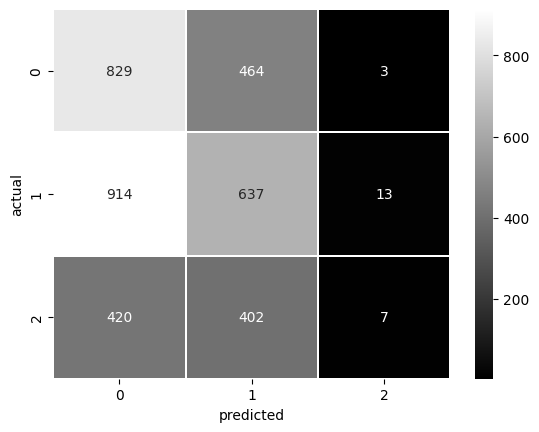

In [140]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths = 0.01,cmap='gray');
#sns.heatmap(confusion_matrix, annot=True, linewidths = 0.01, cmap='gray');

In [143]:
from sklearn.metrics import accuracy_score

accuracy_f = accuracy_score(y_true, y_pred)
accuracy_f

0.39929520195174845

# Confusion matrix - Baseline

In [ ]:
y_true = df['ATMO']
y_true

In [ ]:
df_baseline = df.copy()
df_baseline['ATMO_baseline'] = df_baseline['ATMO'].shift(periods=8,axis=0) #creation of y_pred by shifting target of 7 days
y_baseline = df_baseline['ATMO_baseline'][8:] #take off the 7 first values to drop nan
y_baseline

In [ ]:
results_df = pd.DataFrame({"actual": y_true,
                           "predicted": y_baseline})

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'],
                              normalize='index')

In [ ]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, linewidths = 0.01, cmap='gray');